# EVC Data Visualization
This notebook visualizes Electronic Volume Corrector data using time series plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("724-000005.csv")

# Convert 'Time' to datetime and set as index
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d,%H:%M:%S')
df.set_index('Time', inplace=True)

# Rename columns for clarity
df.rename(columns={
    'Vb [m3]': 'Uncorrected Volume',
    'Vm [m3]': 'Corrected Volume',
    'p.MP  [ bar]': 'Pressure (bar)',
    'p.MP  [ psig]': 'Pressure (psig)',
    'T.MP [{C]': 'Temperature (C)',
    'difference':'Difference'
}, inplace=True)

df.head()


,GONo,ABNo,Uncorrected Volume,VbT [m3],Corrected Volume,VmT [m3],Difference,Pressure (bar),Temperature (C),K.MP,C.MP,St.2,St.4,St.7,St.6,StSy,Ev,Check
Time,,,,,,,,,,,,,,,,,,
2024-11-12 13:00:00,11461,11448,462079.1474,462079.1474,245559,245559,1,1.99040,29.79,0.99861,1.86686,0,14,0,0,15,0x8104,CRC Ok
2024-11-12 14:00:00,11462,11449,462081.1822,462081.1822,245560,245560,4,2.03515,29.85,0.99854,1.90862,0,14,0,0,15,0x8104,CRC Ok
2024-11-12 15:00:00,11463,11450,462088.9274,462088.9274,245564,245564,138,2.06885,29.83,0.99849,1.94046,0,14,0,0,15,0x8104,CRC Ok
2024-11-12 16:00:00,11464,11451,462357.9951,462357.9951,245702,245702,256,2.07779,29.75,0.99847,1.94939,0,14,0,0,15,0x8104,CRC Ok
2024-11-12 17:00:00,11465,11452,462858.8333,462858.8333,245958,245958,108,2.08767,29.65,0.99844,1.95933,0,14,0,0,15,0x8104,CRC Ok


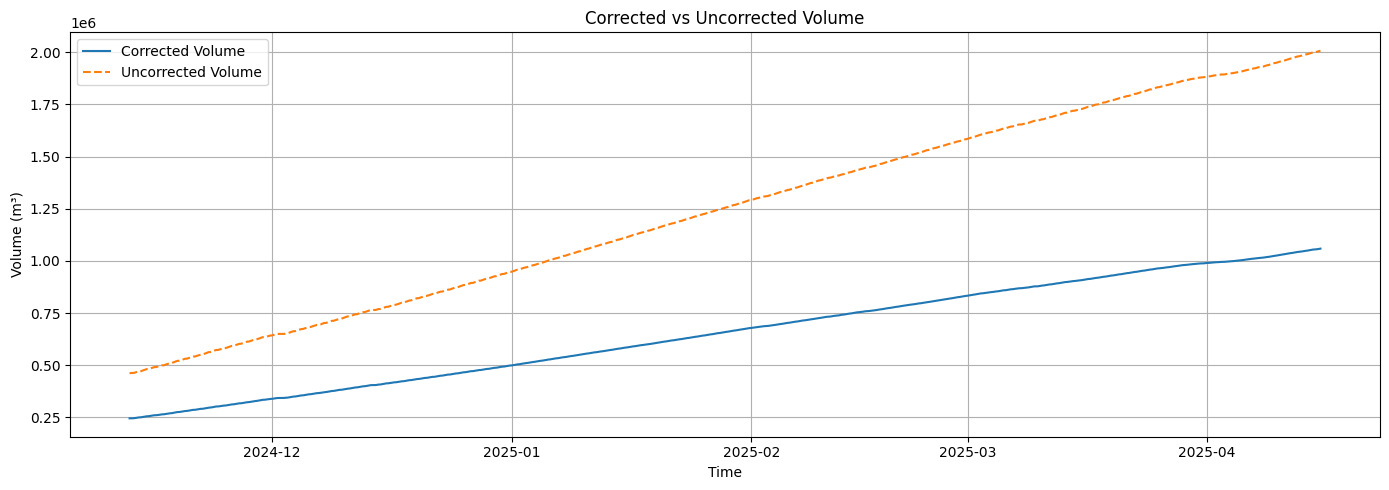

In [2]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Corrected Volume'], label='Corrected Volume')
plt.plot(df.index, df['Uncorrected Volume'], label='Uncorrected Volume', linestyle='--')
plt.title("Corrected vs Uncorrected Volume")
plt.xlabel("Time")
plt.ylabel("Volume (m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


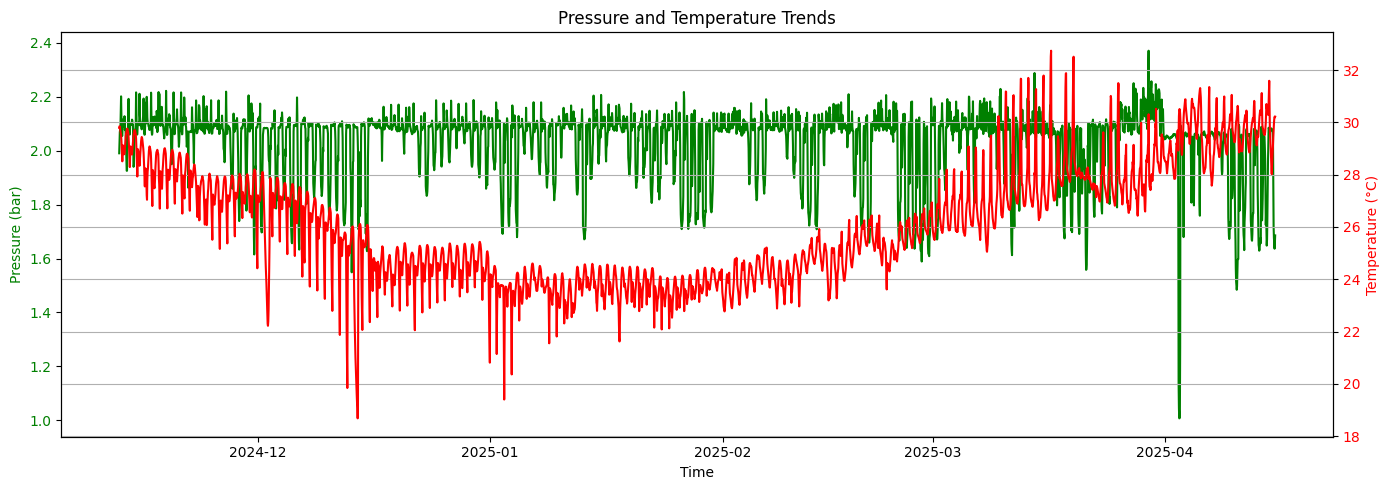

In [3]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.set_title("Pressure and Temperature Trends")
ax1.set_xlabel("Time")

# Pressure
ax1.plot(df.index, df['Pressure (bar)'], color='green', label='Pressure (bar)')
#ax1.plot(df.index, df['Pressure (psig)'], color='green', label='Pressure (psig)')
ax1.set_ylabel("Pressure (bar)", color='green')
#ax1.set_ylabel("Pressure (psig)", color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Temperature on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['Temperature (C)'], color='red', label='Temperature (°C)')
ax2.set_ylabel("Temperature (°C)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.grid(True)
plt.show()


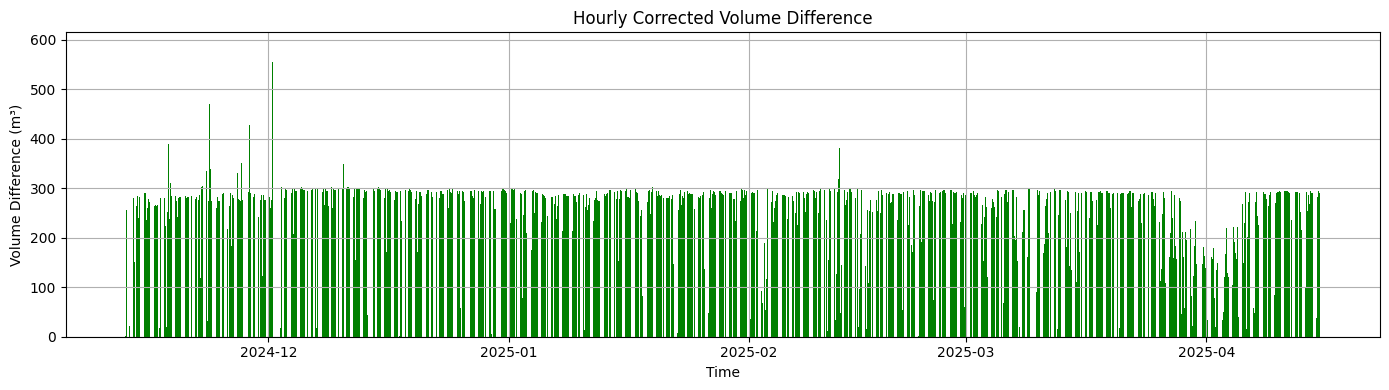

In [4]:
df['Volume Difference'] = df['Corrected Volume'].diff()

plt.figure(figsize=(14, 4))
plt.bar(df.index, df['Volume Difference'], width=0.03, color='green')
plt.title("Hourly Corrected Volume Difference")
plt.xlabel("Time")
plt.ylabel("Volume Difference (m³)")
plt.grid(True)
plt.tight_layout()
plt.show()
